In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
# checking version and gpu support
print("Tensorflow: ", tf.__version__)

print("Tensorflow Gpu: ", tf.test.is_gpu_available())

#print('Tensorboard: , tensorboard.__version__)
#

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tensorflow:  2.12.0
Tensorflow Gpu:  False


It is a starter tutorial for tensor flow 2.0 I am using Fashion MNist data to work through this blog

Let's start with loading the dataset

In [ ]:
mnist = keras.datasets.fashion_mnist

mnist.load_data() is used to load dataset and this gives two set as a output

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Check shape

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

checking max and min value


In [ ]:
print("Maximum value in  X_train", np.max(X_train))
print("Minium value in X_train", np.min(X_train))

Maximum value in  X_train 255
Minium value in X_train 0


So, Here we have a maximum of 255
and a minimum of 0

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Y_train has 10 values from 0 to 9

In [ ]:
class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
class_name

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

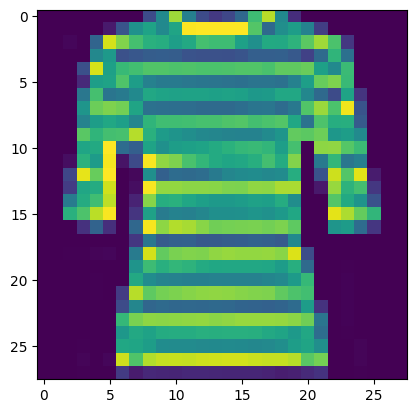

In [ ]:
#print any random image to see
plt.figure()
plt.imshow(X_train[26])

plotting with colobar as we saw we have 0 to 255 value

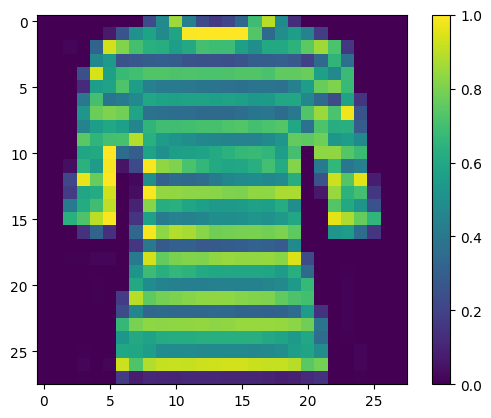

In [ ]:
plt.figure()
plt.imshow(X_train[26],) #cmap='Greys'
plt.colorbar()

turned it grey with the cmap argument

So here we have minimum 0 and maximum 250 value that is pixelet in 28*28 Tensorflow accept values between 0 to 1. So we have to convert values 0-255 to 0-1

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

Now, lets plot the same image with colorbar to check it has changed or not

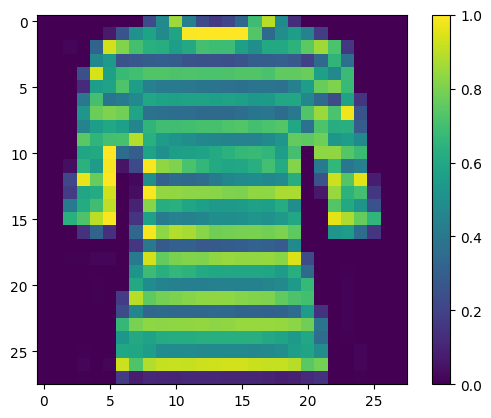

In [ ]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

Yes it has changed to 0-1

**Build the model with TF 2.0**





In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
#We can pass an aray in sequential model or just add another layer

model.add(Flatten(input_shape = (28,28)))
#flatten is used to change input data in 1d

model.add(Dense(128, activation  = 'relu')) #Hidden layer
model.add(Dense(10, activation = 'softmax')) #Output layer
model.summary()
model2 = Sequential()
#We can pass an array in sequential model or just add another layer

model2.add(Flatten(input_shape = (28,28)))
#Flatten is used to change input data in 1d

model2.add(Dense(128, activation = 'linear'))
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)            

In [ ]:
784*128+128

100480

In [ ]:
from keras.utils.sidecar_evaluator import optimizer
#Complition of our model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'],

)
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'],

)

In [ ]:
#fit the model
hist1 = model.fit(X_train, y_train, epochs =30)
#fit the model
hist2 = model2.fit(X_train, y_train, epochs =30)




#epochs is used to pass parameter how many times our data is going to train
#it uses backpropgation method at every epochs to minimize the loss accuracy

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1400 - accuracy: 0.9465
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1386 - accuracy: 0.9483
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1345 - accuracy: 0.9496
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1347 - accuracy: 0.9481
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1292 - accuracy: 0.9511
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1280 - accuracy: 0.9522
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1257 - accuracy: 0.9525
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1228 - accuracy: 0.9538
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1200 - accuracy: 0.9542
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.118

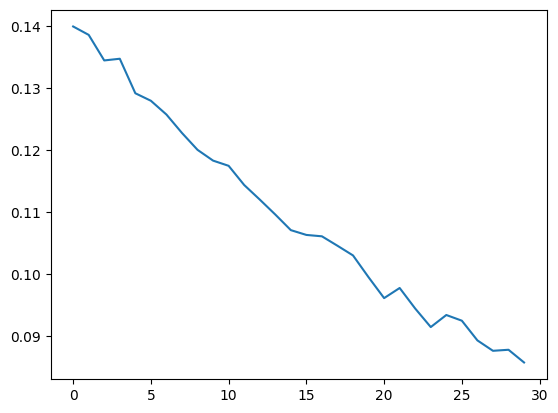

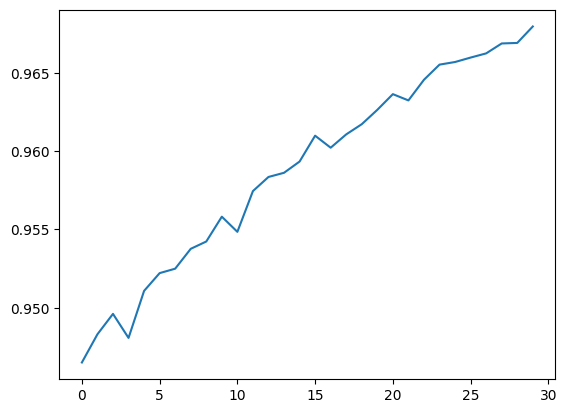

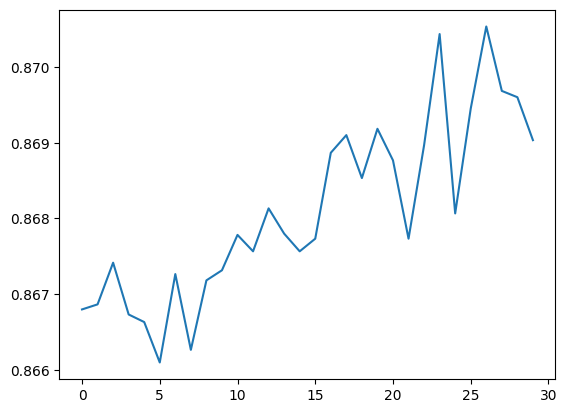

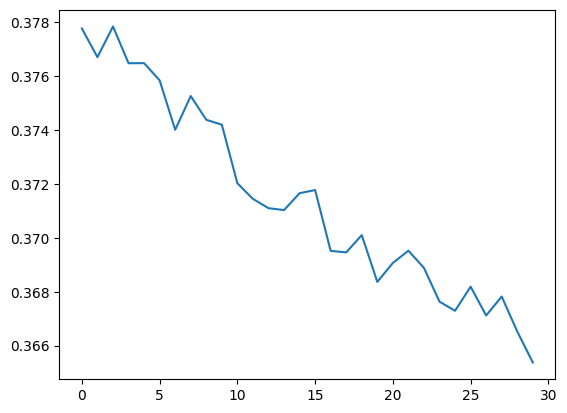

In [ ]:
loss1 = hist1.history["loss"]
acc1 = hist1.history["accuracy"]
plt.plot(loss1)
plt.show()
plt.plot(acc1)
plt.show()
loss2 = hist2.history["loss"]
acc2 = hist2.history["accuracy"]
plt.plot(acc2)
plt.show()
plt.show()
plt.plot(loss2)

In [ ]:
#Checking tes_loss, test_acc
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss2, test_acc2

313/313 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.8423


(0.4558700621128082, 0.8422999978065491)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict_classes(X_test)
y_pred2 = model2.predict_classes(X_test)

AttributeError: ignored

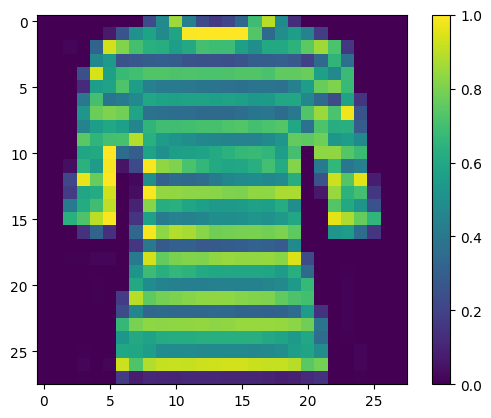

In [ ]:
plt.figure()
plt.imshow(X_train[26])
plt.colorbar()

1/1 [==============================] - 0s 19ms/step


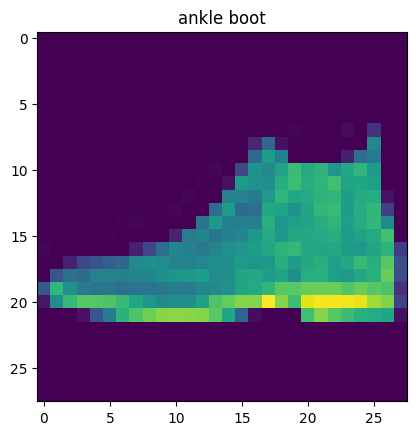

1/1 [==============================] - 0s 24ms/step


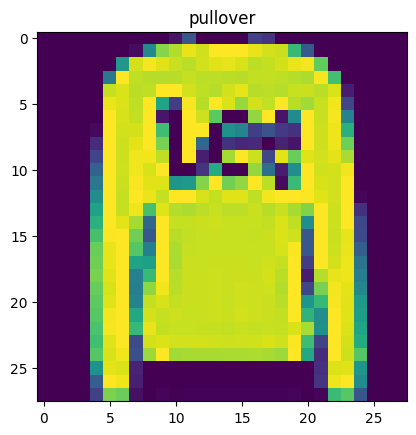

1/1 [==============================] - 0s 22ms/step


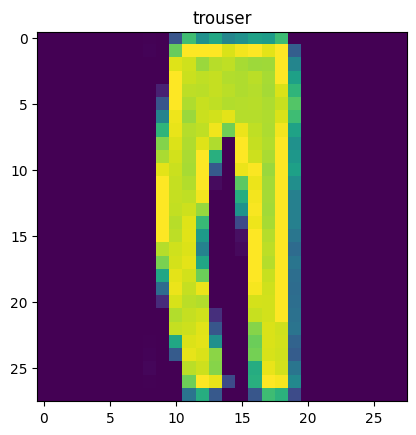

1/1 [==============================] - 0s 22ms/step


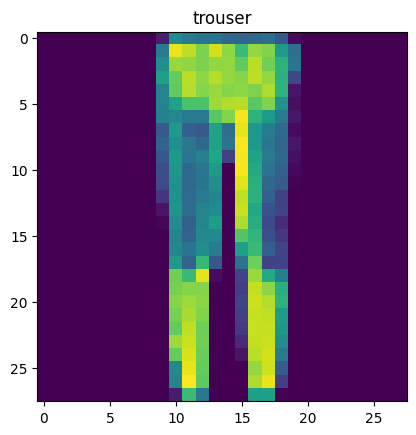

1/1 [==============================] - 0s 21ms/step


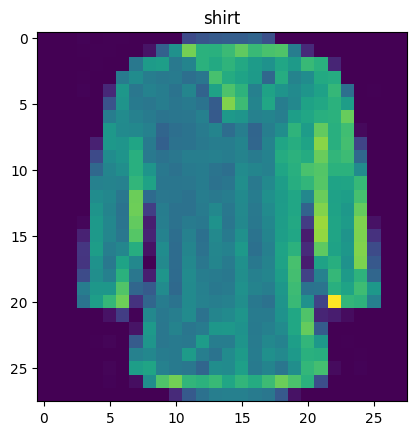

1/1 [==============================] - 0s 27ms/step


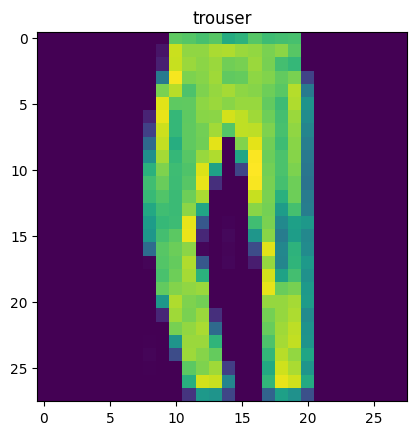

1/1 [==============================] - 0s 30ms/step


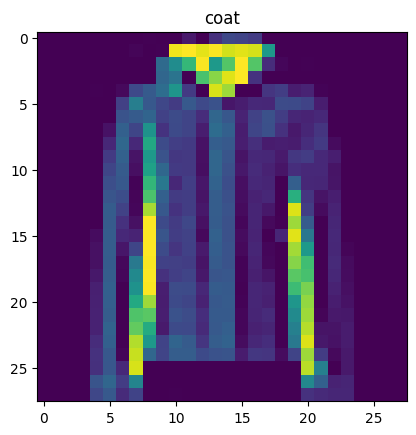

1/1 [==============================] - 0s 49ms/step


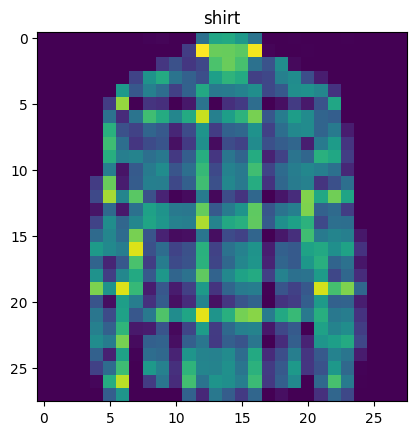

1/1 [==============================] - 0s 30ms/step


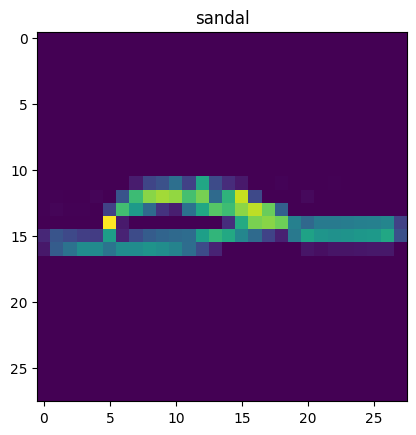

1/1 [==============================] - 0s 32ms/step


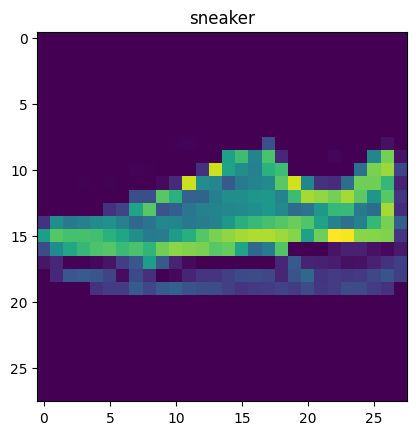

In [ ]:
for idx in range(10):
  pred = model.predict(X_test[idx:idx+1])
  plt.imshow(X_test[idx])
  plt.title(class_name[np.argmax(pred)])
  plt.show()